In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from jc_model import *
%matplotlib inline

In [2]:
wa = 1.0*2*np.pi # frekuensi eksitasi atom
wc = wa
N = 15 
use_rwa = False
g = 0.05*wa
kappa = 0.005
gamma = 0.0
n_th = 0.0
t_list = np.linspace(0,25,101)

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz = tensor(qeye(N), sigmax()) # Operator sigma_z


# Keadaan awal
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi
#psi_0 = tensor(basis(N,0), basis(2,0)) # keadaan dasar

In [3]:
H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)


result = mesolve(H, psi_0, t_list, [], [commutator(sm.dag(),sm)])

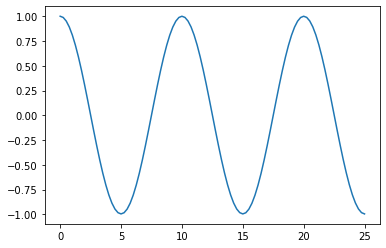

In [4]:
plt.plot(t_list, result.expect[0])

In [5]:
help(mesolve)

Help on function mesolve in module qutip.mesolve:

mesolve(H, rho0, tlist, c_ops=None, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)
    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.
    
    Evolve the state vector or density matrix (`rho0`) using a given
    Hamiltonian (`H`) and an [optional] set of collapse operators
    (`c_ops`), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian.
    
    The output is either the state vector at arbitrary points in time
    (`tlist`), or the expectation values of the supplied operators
    (`e_ops`). If e_ops is a callback function, it is invoked for each
    time in `tlist` with time and the state as arguments, and the function
    does not use any return values.
    
    If either `H` or the 

In [6]:
sz = commutator(sm.dag(), sm)

szz = tensor(qeye(N), sigmax())

In [7]:
sz == szz

False

In [8]:
sm

Quantum object: dims = [[15, 2], [15, 2]], shape = (30, 30), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [9]:
create(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]